In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# read csv file
df = pd.read_csv('train_FD001.txt', sep=' ', header=None)

# dropping NAN values
df = df.dropna(axis=1, how='all')

# Naming the columns
df.columns = ["unit", "cycles", "Op1",
                      "Op2", "Op3", "S1", "S2",
                      "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11",
                      "S12", "S13", "S14", "S15", "S16", "S17", "S18", "S19", "S20", "S21"]
# show dataframe
df.head()



,unit,cycles,Op1,Op2,Op3,S1,S2,S3,S4,S5,...,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


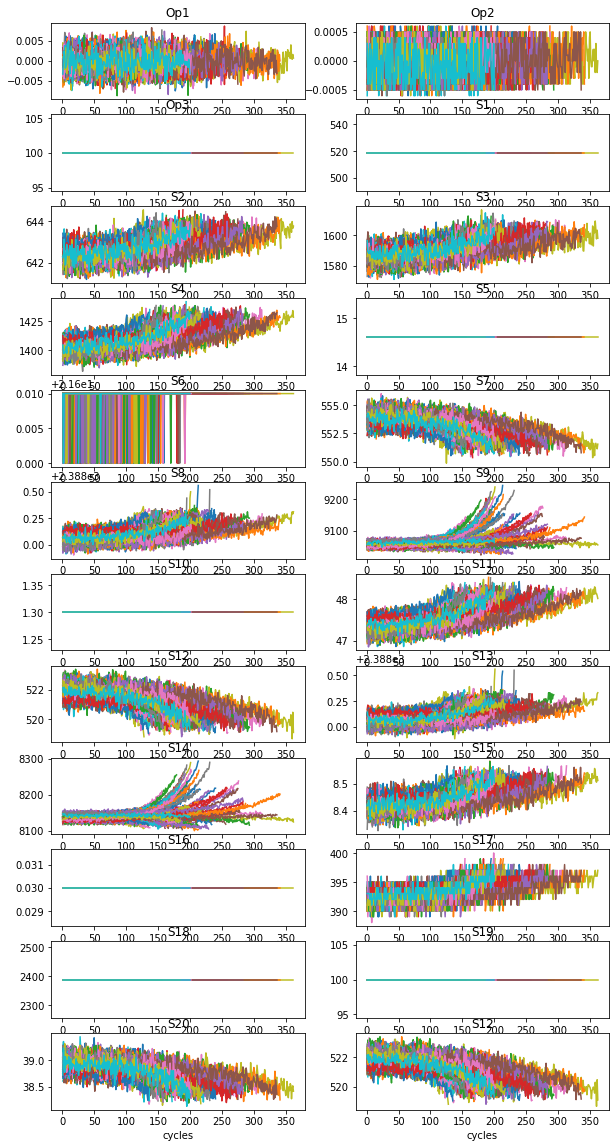

In [2]:
sensors = ["Op1", "Op2", "Op3","S1","S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12",
           "S13", "S14", "S15", "S16", "S17", "S18", "S19", "S20", "S12"]

fig, axes = plt.subplots(12, 2, figsize=(10,20))

for sensor, ax in zip(sensors, axes.ravel()):
    for n in range(1,101):
        df[df.unit==n].plot(x='cycles', y=sensor, ax=ax)
        ax.set_title(sensor)

        # remove the long legend
        ax.legend().remove()

In [3]:
# data preprocessing; removing unnecessary data

df.drop(['Op1', 'Op2', 'Op3','S1', 'S5', 'S6', 'S16', 'S10', 'S18', 'S19'], axis=1, inplace=True)
df.head()

# create dataframe for correlation matrix to remove unit and cycle
corr_df = df.copy()
corr_df.drop(['unit', 'cycles'], axis=1, inplace=True)

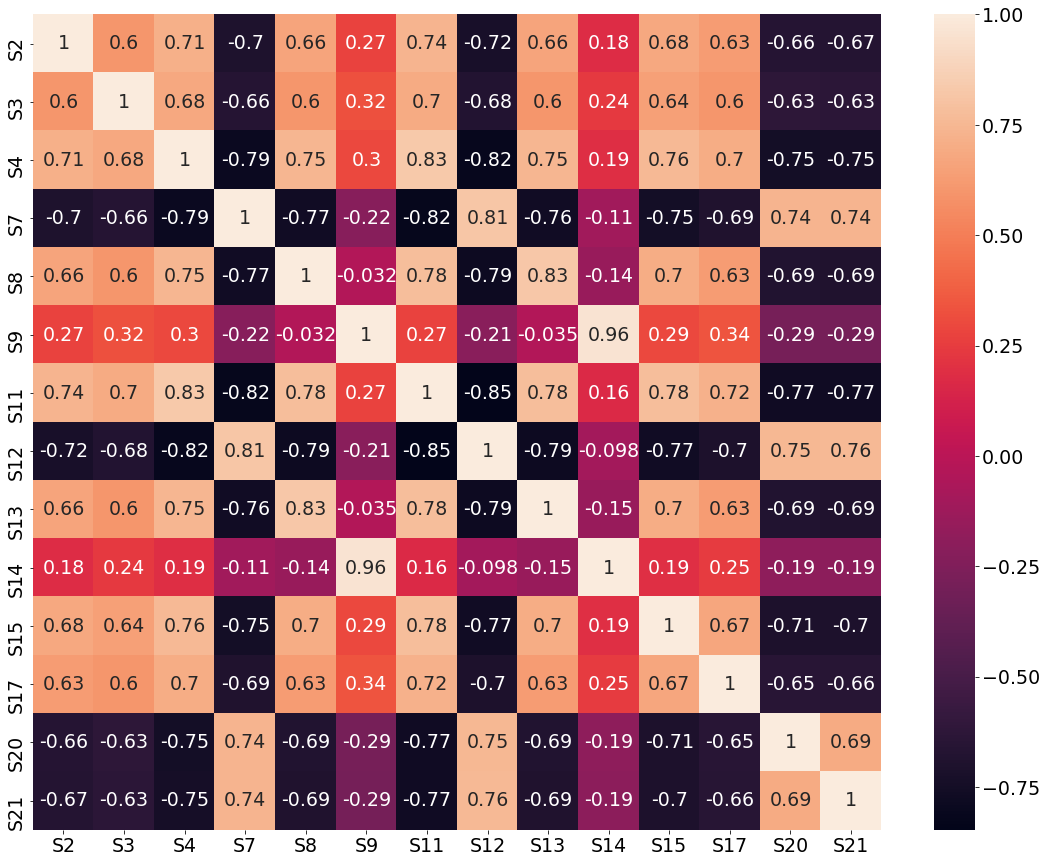

In [3]:
import seaborn as sns
plt.figure(figsize=(19,15))
plt.rcParams.update({'font.size': 19})
corrMatrix = corr_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

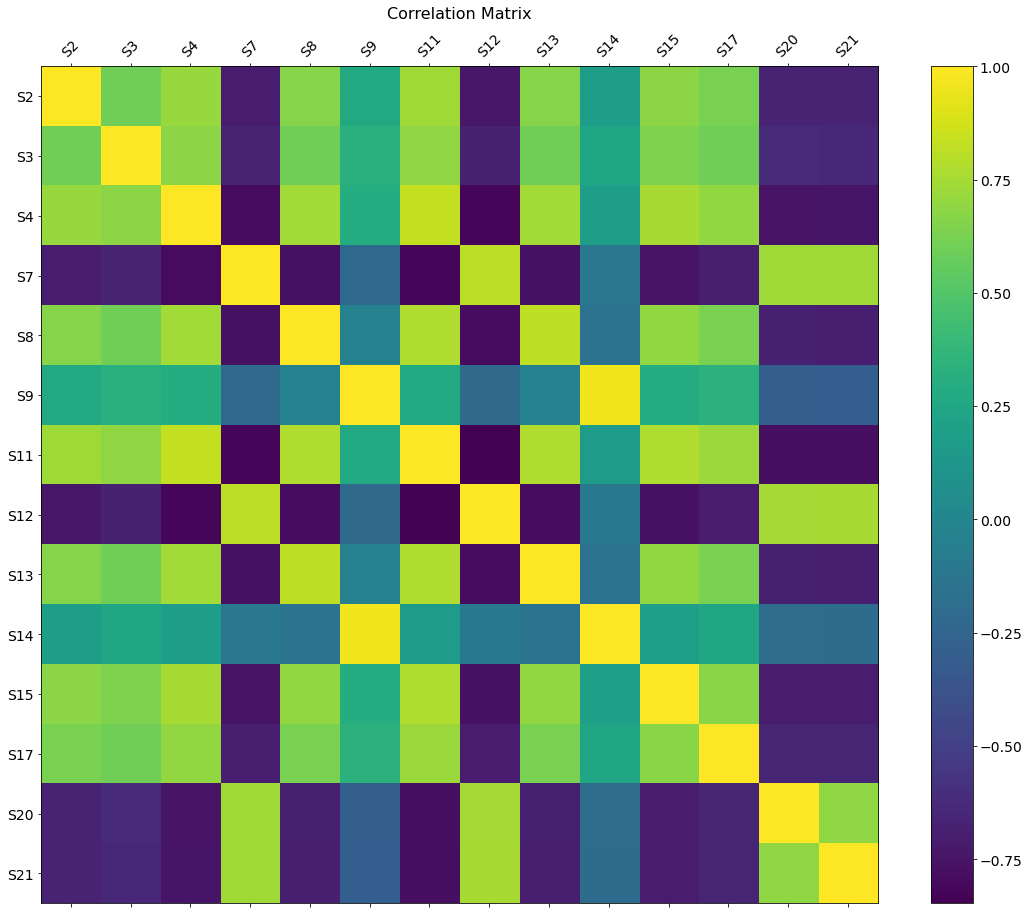

In [42]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16); 

In [4]:
# splitting train and test data, test size 20%

# train set
df_train = df[(df.unit <= 80)]
X_train = df_train[['S2', 'S3', 'S4', 'S7', 'S8', 'S9', 'S11', 'S12',
          'S13', 'S14', 'S15', 'S17', 'S20', 'S21']].values
y_train = df_train[['cycles']].values.ravel()

# test set
df_test = df[(df.unit > 80)]
X_test = df_test[['S2', 'S3', 'S4', 'S7', 'S8', 'S9', 'S11', 'S12',
          'S13', 'S14', 'S15', 'S17', 'S20', 'S21']].values
y_test = df_test[['cycles']].values.ravel()

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# creating and training linear regression model
lreg = linear_model.LinearRegression()
lreg.fit(X_train, y_train)

# prediction
lreg_prediction = lreg.predict(X_test)

# RMSE
lreg_rmse = sqrt(mean_squared_error(y_test, lreg_prediction))
print("RMSE: ", lreg_rmse)

# r2 score
lreg_r2 = r2_score(y_test, lreg_prediction)
print("r2 score: ", lreg_r2)

RMSE:  56.04558952932391
r2 score:  0.4769293046538544


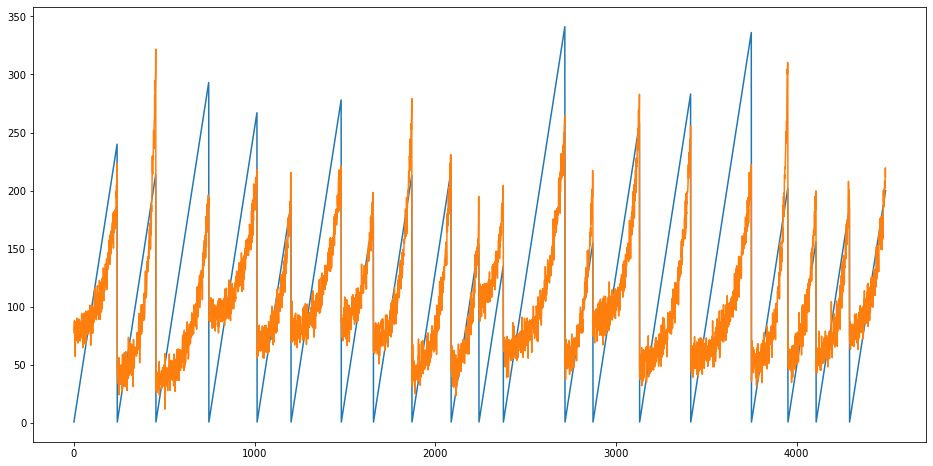

In [7]:
plt.figure(figsize = (16, 8))
plt.plot(y_test)
plt.plot(lreg_prediction)

In [5]:
# getting the datarame with the maximum cycles of each unit

idx = df_test.groupby('unit')['cycles'].transform(max) == df_test['cycles']
df_testmax = df_test[idx]

df_testmax

,unit,cycles,S2,S3,S4,S7,S8,S9,S11,S12,S13,S14,S15,S17,S20,S21
16377,81,240,644.01,1601.01,1423.61,550.75,2388.28,9061.24,48.12,519.48,2388.22,8129.61,8.4922,397,38.37,23.0289
16591,82,214,643.73,1601.66,1427.73,551.57,2388.16,9215.59,48.30,520.01,2388.16,8267.90,8.5222,399,38.56,23.0292
16884,83,293,643.77,1605.59,1430.64,551.68,2388.25,9045.98,48.21,519.45,2388.31,8115.28,8.5123,397,38.42,22.9926
17151,84,267,643.68,1606.08,1430.13,550.64,2388.25,9079.24,48.17,519.77,2388.23,8149.66,8.5367,396,38.49,23.1018
17339,85,188,643.64,1603.10,1434.88,551.23,2388.28,9050.97,48.17,519.61,2388.30,8124.14,8.4977,396,38.61,22.9752
17617,86,278,643.15,1600.16,1425.47,551.62,2388.23,9078.73,48.16,519.63,2388.22,8151.89,8.4919,398,38.51,22.9947
17795,87,178,643.44,1597.69,1433.25,551.24,2388.32,9050.62,48.11,519.79,2388.31,8121.08,8.5082,397,38.61,23.0740
18008,88,213,643.65,1602.86,1431.92,551.76,2388.13,9149.80,48.40,519.95,2388.19,8212.51,8.5067,397,38.45,22.9829
18225,89,217,643.18,1603.61,1431.32,551.03,2388.17,9081.82,48.39,519.86,2388.22,8154.80,8.4936,397,38.19,23.0900
18379,90,154,643.60,1598.79,1434.02,550.77,2388.32,9032.34,48.40,519.31,2388.34,8110.86,8.5637,395,38.44,23.0727
